In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kde, chi2_contingency

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

from imblearn.under_sampling import TomekLinks
from sklearn.svm import OneClassSVM, SVC
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

from sklearn import set_config

import joblib



from imblearn.over_sampling import ADASYN
#from imblearn_ensemble import MWMOTE


### Importation des Donnée

In [10]:
data = pd.read_csv('Synthetic_Financial_datasets_log.csv')
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [11]:
data.shape

(6362620, 11)

In [11]:
data = data.copy()
data = data[(data['type'] == "CASH_OUT") |  (data['type'] == "TRANSFER")].copy()
print(data.shape)

(2770409, 11)


In [6]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.0,2719172.89,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.0,8383.29,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770409 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 253.6+ MB


In [37]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
data = data.drop(['nameOrig', 'nameDest'], axis=1)

In [21]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,0


In [13]:
# On garde toutes les fraudes
fraud = data[data['isFraud'] == 1]
# On prend un échantillon aléatoire de la classe non-fraude (par exemple 2 à 5 fois le nombre de fraudes)
non_fraud = data[data['isFraud'] == 0].sample(n=fraud.shape[0]*5, random_state=42)

# On combine et on mélange
data_reduced = pd.concat([fraud, non_fraud]).sample(frac=1, random_state=42).reset_index(drop=True)

In [22]:
data_reduced.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,164,TRANSFER,494531.92,0.0,0.0,1149485.91,1644017.84,0,0
1,282,CASH_OUT,25494.83,0.0,0.0,178520.93,204015.76,0,0
2,283,CASH_OUT,212105.20,446.0,0.0,144622.75,356727.96,0,0
3,249,CASH_OUT,134228.50,0.0,0.0,295869.35,430097.85,0,0
4,355,CASH_OUT,188011.64,0.0,0.0,1359803.13,1547814.77,0,0


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Sous-échantillonnage
fraud = data[data['isFraud'] == 1]
non_fraud = data[data['isFraud'] == 0].sample(n=fraud.shape[0]*5, random_state=42)
data_reduced = pd.concat([fraud, non_fraud]).sample(frac=1, random_state=42).reset_index(drop=True)

# 2. Préparation des variables
X = data_reduced.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)
y = data_reduced['isFraud']

# 3. Split train/test stratifié
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 4. Encodage de 'type'
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
type_encoded_train = encoder.fit_transform(X_train[['type']])
type_encoded_test = encoder.transform(X_test[['type']])
type_encoded_train_df = pd.DataFrame(type_encoded_train, columns=encoder.get_feature_names_out(['type']), index=X_train.index)
type_encoded_test_df = pd.DataFrame(type_encoded_test, columns=encoder.get_feature_names_out(['type']), index=X_test.index)
X_train_encoded = pd.concat([X_train.drop(['type'], axis=1), type_encoded_train_df], axis=1)
X_test_encoded = pd.concat([X_test.drop(['type'], axis=1), type_encoded_test_df], axis=1)

# 5. Équilibrage (ADASYN) sur le train uniquement
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train_encoded, y_train)

KeyError: "['nameOrig', 'nameDest'] not found in axis"

### Traitement des valeurs aberrantes.

In [5]:
# Appliquer la racine carrée à toutes les variables quantitatives continues (en gardant le signe)
def appliquer_racine_carre_variables_continues(df):
    data_corrige = df.copy()
    # Liste des variables quantitatives continues à transformer
    variables_continues = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
    for col in variables_continues:
        if col in data_corrige.columns:
            data_corrige[col] = data_corrige[col].apply(lambda x: np.sign(x) * np.sqrt(abs(x)))
    return data_corrige

# Application sur votre DataFrame
data = appliquer_racine_carre_variables_continues(data)

In [11]:
data['amount'].describe()

count    6.362620e+06
mean     3.207711e+02
std      2.774307e+02
min      0.000000e+00
25%      1.157133e+02
50%      2.736274e+02
75%      4.568605e+02
max      9.614859e+03
Name: amount, dtype: float64

### Equilibrage des classes

In [7]:



# Séparation des variables explicatives et de la cible
X = data.drop('isFraud', axis=1)  # Remplace 'target' par le nom de ta variable cible
y = data['isFraud']

# Application d'ADASYN
adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X, y)

# Vérification du nouvel équilibre
print("Répartition après ADASYN :")
print(y_res.value_counts())

Répartition après ADASYN :
isFraud
0    2762196
1    2761832
Name: count, dtype: int64


### Encodage des donnée

In [6]:
# Réinitialiser l'index AVANT l'encodage
data = data.reset_index(drop=True)

# Encodage OneHot
DataEncoder = OneHotEncoder(sparse_output=False)
type_encoded = DataEncoder.fit_transform(data[['type']])
type_encoded_df = pd.DataFrame(type_encoded, columns=DataEncoder.get_feature_names_out(['type']))

# Réinitialiser l'index du DataFrame encodé pour qu'il corresponde à 'data'
type_encoded_df = type_encoded_df.reset_index(drop=True)

# Concaténation sans NaN
data = pd.concat([data.drop('type', axis=1), type_encoded_df], axis=1)

In [14]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_TRANSFER
2,1.0,13.453624,13.453624,0.0,0.000000,0.000000,1.0,0.0,1.0,0.0
3,1.0,13.453624,13.453624,0.0,145.540372,0.000000,1.0,0.0,0.0,1.0
15,1.0,478.679371,123.794184,0.0,71.295161,226.965724,0.0,0.0,0.0,1.0
19,1.0,464.015409,26.551836,0.0,149.749791,0.000000,0.0,0.0,0.0,1.0
24,1.0,558.288357,104.091306,0.0,79.164386,1648.991477,0.0,0.0,0.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   nameOrig        int64  
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        int64  
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
 10  type_CASH_IN    float64
 11  type_CASH_OUT   float64
 12  type_DEBIT      float64
 13  type_PAYMENT    float64
 14  type_TRANSFER   float64
dtypes: float64(10), int64(5)
memory usage: 728.1 MB


In [30]:
data.isnull().sum()

step              1551890
amount            1551890
oldbalanceOrg     1551890
newbalanceOrig    1551890
oldbalanceDest    1551890
newbalanceDest    1551890
isFraud           1551890
isFlaggedFraud    1551890
type_CASH_OUT     1551890
type_TRANSFER     1551890
dtype: int64

### Création du pipeline

In [16]:
# pipeline
# Séparation des variables explicatives et de la cible
X = data.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = data['isFraud']

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),  # Choisis le nombre de composantes selon la variance souhaitée
    ('clf', LogisticRegression())
])

# Entraînement du modèle
pipeline.fit(X_train, y_train)

# Prédiction
y_pred = pipeline.predict(X_test)

ValueError: could not convert string to float: 'CASH_OUT'

In [14]:
# 2. Séparation des variables explicatives et de la cible
X = data_reduced.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = data_reduced['isFraud']

# 3. Séparation train/test (avant l'encodage pour éviter le data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Encodage de la variable 'type' sur X_train et X_test séparément
encoder = OneHotEncoder(sparse_output=False)
type_encoded_train = encoder.fit_transform(X_train[['type']])
type_encoded_train_df = pd.DataFrame(
    type_encoded_train, 
    columns=encoder.get_feature_names_out(['type']),
    index=X_train.index
)
type_encoded_test = encoder.transform(X_test[['type']])
type_encoded_test_df = pd.DataFrame(
    type_encoded_test, 
    columns=encoder.get_feature_names_out(['type']),
    index=X_test.index
)

# 5. Concaténation des données encodées et suppression de 'type'
X_train_encoded = pd.concat([
    X_train.drop(['type'], axis=1),
    type_encoded_train_df
], axis=1)
X_test_encoded = pd.concat([
    X_test.drop(['type'], axis=1),
    type_encoded_test_df
], axis=1)

# 6. Application d'ADASYN sur les données d'entraînement uniquement
adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train_encoded, y_train)

# 7. Création des pipelines
pipeline_ocsvm = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('clf', OneClassSVM(gamma='auto'))
])
pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('clf', SVC(class_weight='balanced', probability=True, random_state=42))
])
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('clf', BalancedBaggingClassifier(
        estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        sampling_strategy='auto',
        replacement=False,
        random_state=42
    ))
])

set_config(display='diagram')

print("Pipeline OC SVM :")
display(pipeline_ocsvm)

print("Pipeline CS-SVC :")
display(pipeline_svc)

print("Pipeline BB XGBoost :")
display(pipeline_xgb)


Pipeline OC SVM :


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('clf', OneClassSVM(gamma='auto'))])

Pipeline CS-SVC :


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('clf',
                 SVC(class_weight='balanced', probability=True,
                     random_state=42))])

Pipeline BB XGBoost :


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('clf',
                 BalancedBaggingClassifier(estimator=XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   device=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric='logloss',
                                                                   feature_types=None,
                                                                   fe...
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=None,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None, ...),
                                           random_state=42))])

C:\Users\Yodja\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:27:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Yodja\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:27:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Yodja\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:27:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Yodja\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:27:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

Tableau des scores pour chaque modèle :


,Modèle,F1-score,PR AUC,Recall,Precision,ROC AUC
0,OC SVM,0.425743,0.268742,0.942179,0.275004,0.722642
1,CS-SVC,0.754395,0.772957,0.888010,0.655730,0.945598
2,BB XGBoost,0.803621,0.955392,0.972611,0.684662,0.988009


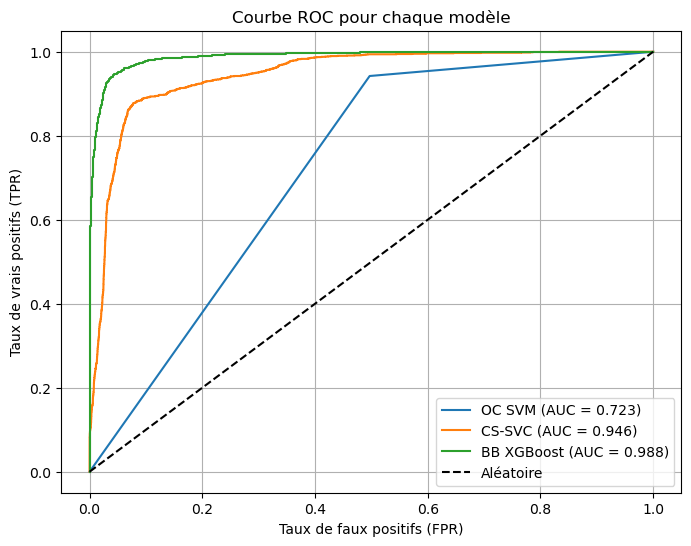

In [16]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, average_precision_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt

# 8. Entraînement des modèles
# OC SVM : uniquement sur la classe non-fraude
pipeline_ocsvm.fit(X_train_res[y_train_res == 0])
# CS-SVC et BB XGBoost : sur tout le jeu rééquilibré
pipeline_svc.fit(X_train_res, y_train_res)
pipeline_xgb.fit(X_train_res, y_train_res)

# 9. Prédictions
y_pred_ocsvm = pipeline_ocsvm.predict(X_test_encoded)
y_pred_ocsvm = (y_pred_ocsvm == -1).astype(int)
y_pred_svc = pipeline_svc.predict(X_test_encoded)
y_pred_xgb = pipeline_xgb.predict(X_test_encoded)

# 10. Probabilités pour ROC AUC (sauf OC SVM)
# Pour OC SVM, on n'a pas de proba, on utilise la prédiction binaire
y_proba_ocsvm = y_pred_ocsvm  # approximation pour ROC/PR AUC
y_proba_svc = pipeline_svc.predict_proba(X_test_encoded)[:,1]
y_proba_xgb = pipeline_xgb.predict_proba(X_test_encoded)[:,1]

# Calcul des métriques
scores = []
# OC SVM
scores.append({
    "Modèle": "OC SVM",
    "F1-score": f1_score(y_test, y_pred_ocsvm),
    "PR AUC": average_precision_score(y_test, y_proba_ocsvm),
    "Recall": recall_score(y_test, y_pred_ocsvm),
    "Precision": precision_score(y_test, y_pred_ocsvm),
    "ROC AUC": roc_auc_score(y_test, y_proba_ocsvm)
})
# CS-SVC
scores.append({
    "Modèle": "CS-SVC",
    "F1-score": f1_score(y_test, y_pred_svc),
    "PR AUC": average_precision_score(y_test, y_proba_svc),
    "Recall": recall_score(y_test, y_pred_svc),
    "Precision": precision_score(y_test, y_pred_svc),
    "ROC AUC": roc_auc_score(y_test, y_proba_svc)
})
# BB XGBoost
scores.append({
    "Modèle": "BB XGBoost",
    "F1-score": f1_score(y_test, y_pred_xgb),
    "PR AUC": average_precision_score(y_test, y_proba_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "ROC AUC": roc_auc_score(y_test, y_proba_xgb)
})

# Affichage du tableau des scores
df_scores = pd.DataFrame(scores)
print("Tableau des scores pour chaque modèle :")
display(df_scores)

# Affichage des courbes ROC pour chaque modèle
plt.figure(figsize=(8,6))
fpr_ocsvm, tpr_ocsvm, _ = roc_curve(y_test, y_proba_ocsvm)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_proba_svc)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
plt.plot(fpr_ocsvm, tpr_ocsvm, label="OC SVM (AUC = {:.3f})".format(scores[0]["ROC AUC"]))
plt.plot(fpr_svc, tpr_svc, label="CS-SVC (AUC = {:.3f})".format(scores[1]["ROC AUC"]))
plt.plot(fpr_xgb, tpr_xgb, label="BB XGBoost (AUC = {:.3f})".format(scores[2]["ROC AUC"]))
plt.plot([0,1], [0,1], 'k--', label="Aléatoire")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC pour chaque modèle")
plt.legend()
plt.grid()
plt.show()

In [20]:
joblib.dump(pipeline_xgb, "C:\\Users\\Yodja\\cours python\\app_memoire\\pipeline_xgb.pkl")

['C:\\Users\\Yodja\\cours python\\app_memoire\\pipeline_xgb.pkl']

### Entrainement du modèle

In [1]:
from sklearn.metrics import confusion_matrix

# Pour OC SVM
print("Matrice de confusion - OC SVM :")
print(confusion_matrix(y_test, y_pred_ocsvm))

# Pour CS-SVC
print("Matrice de confusion - CS-SVC :")
print(confusion_matrix(y_test, y_pred_svc))

# Pour BB XGBoost
print("Matrice de confusion - BB XGBoost :")
print(confusion_matrix(y_test, y_pred_bb))

Matrice de confusion - OC SVM :


NameError: name 'y_test' is not defined

In [ ]:
# Supposons que tu as déjà X_res, y_res (après ADASYN et encodage)
# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# 1. Tomek Links (nettoyage)
#tl = TomekLinks()
#X_tl, y_tl = tl.fit_resample(X_train, y_train)

In [ ]:
results = []

# 2.1 One-Class SVM (OC SVM)
ocsvm = OneClassSVM(gamma='auto')
ocsvm.fit(X_res[y_res == 0])  # On entraîne sur la classe majoritaire (non-fraude)
y_pred_ocsvm = ocsvm.predict(X_test)
# OneClassSVM retourne -1 (anomalie) et 1 (normal), on mappe pour comparer à y_test
y_pred_ocsvm = (y_pred_ocsvm == -1).astype(int)  # 1 = fraude détectée

results.append({
    "Modèle": "OC SVM",
    "F1-score": f1_score(y_test, y_pred_ocsvm),
    "ROC AUC": roc_auc_score(y_test, y_pred_ocsvm),
    "Recall": recall_score(y_test, y_pred_ocsvm),
    "Precision": precision_score(y_test, y_pred_ocsvm)
})

In [ ]:
# 2.2 Class-Weighted SVC (CS-SVC)
svc = SVC(class_weight='balanced', probability=True, random_state=42)
svc.fit(X_tl, y_tl)
y_pred_svc = svc.predict(X_test)
y_proba_svc = svc.predict_proba(X_test)[:,1]

results.append({
    "Modèle": "CS-SVC",
    "F1-score": f1_score(y_test, y_pred_svc),
    "ROC AUC": roc_auc_score(y_test, y_proba_svc),
    "Recall": recall_score(y_test, y_pred_svc),
    "Precision": precision_score(y_test, y_pred_svc)
})

In [ ]:
# 2.3 Balanced Bagging XGBoost (BB XGBoost)
bb_xgb = BalancedBaggingClassifier(
    base_estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    sampling_strategy='auto',
    replacement=False,
    random_state=42
)
bb_xgb.fit(X_tl, y_tl)
y_pred_bb = bb_xgb.predict(X_test)
y_proba_bb = bb_xgb.predict_proba(X_test)[:,1]

results.append({
    "Modèle": "BB XGBoost",
    "F1-score": f1_score(y_test, y_pred_bb),
    "ROC AUC": roc_auc_score(y_test, y_proba_bb),
    "Recall": recall_score(y_test, y_pred_bb),
    "Precision": precision_score(y_test, y_pred_bb)
})

In [ ]:
# Affichage du tableau des scores
df_results = pd.DataFrame(results)
print(df_results)

In [ ]:
results = []

# 2.1 One-Class SVM (OC SVM)
ocsvm = OneClassSVM(gamma='auto')
ocsvm.fit(X_tl[y_tl==0])  # On entraîne sur la classe majoritaire (non-fraude)
y_pred_ocsvm = ocsvm.predict(X_test)
# OneClassSVM retourne -1 (anomalie) et 1 (normal), on mappe pour comparer à y_test
y_pred_ocsvm = (y_pred_ocsvm == -1).astype(int)  # 1 = fraude détectée

results.append({
    "Modèle": "OC SVM",
    "F1-score": f1_score(y_test, y_pred_ocsvm),
    "ROC AUC": roc_auc_score(y_test, y_pred_ocsvm),
    "Recall": recall_score(y_test, y_pred_ocsvm),
    "Precision": precision_score(y_test, y_pred_ocsvm)
})

# 2.2 Class-Weighted SVC (CS-SVC)
svc = SVC(class_weight='balanced', probability=True, random_state=42)
svc.fit(X_tl, y_tl)
y_pred_svc = svc.predict(X_test)
y_proba_svc = svc.predict_proba(X_test)[:,1]

results.append({
    "Modèle": "CS-SVC",
    "F1-score": f1_score(y_test, y_pred_svc),
    "ROC AUC": roc_auc_score(y_test, y_proba_svc),
    "Recall": recall_score(y_test, y_pred_svc),
    "Precision": precision_score(y_test, y_pred_svc)
})

# 2.3 Balanced Bagging XGBoost (BB XGBoost)
bb_xgb = BalancedBaggingClassifier(
    base_estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    sampling_strategy='auto',
    replacement=False,
    random_state=42
)
bb_xgb.fit(X_tl, y_tl)
y_pred_bb = bb_xgb.predict(X_test)
y_proba_bb = bb_xgb.predict_proba(X_test)[:,1]

results.append({
    "Modèle": "BB XGBoost",
    "F1-score": f1_score(y_test, y_pred_bb),
    "ROC AUC": roc_auc_score(y_test, y_proba_bb),
    "Recall": recall_score(y_test, y_pred_bb),
    "Precision": precision_score(y_test, y_pred_bb)
})

In [ ]:
# Affichage du tableau des scores
df_results = pd.DataFrame(results)
print(df_results)